In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl
import seaborn as sns

pd.set_option("display.min_rows", 10)
pd.set_option('display.max_columns', None)

In [2]:
class GetDataFrame:
    EQUIPMENT_LIST = ("CW500Viewer", "equip2")

    def __init__(self, equip_model: str, file_path: str):
        if equip_model not in self.EQUIPMENT_LIST:
            raise ValueError(f"equip_model must be one of {self.EQUIPMENT_LIST}. Got: {equip_model}")

        self.equip_model = equip_model
        self.file_path = file_path
        self.df = None  

    def load(self) -> pd.DataFrame:
        if self.equip_model == "CW500Viewer":
            self.df = self._get_and_clean_cw500_df()
            return self.df
            
        elif self.equip_model == "equip2":
            self.df = self._get_and_clean_equip2_df()
            return self.df
  
        raise ValueError(f"Unsupported equip_model: {self.equip_model}")

    def _get_and_clean_cw500_df(self) -> pd.DataFrame:
        df = pd.read_csv(self.file_path, sep=';', decimal=',', skiprows=37)

        rename_map = {'MIN_VL1[V][V]': 'Vab_min', 'MIN_VL2[V][V]': 'Vbc_min', 'MIN_VL3[V][V]': 'Vca_min',
                      'AVG_VL1[V][V]': 'Vab_avg', 'AVG_VL2[V][V]': 'Vbc_avg', 'AVG_VL3[V][V]': 'Vca_avg',
                      'MAX_VL1[V][V]': 'Vab_max', 'MAX_VL2[V][V]': 'Vbc_max', 'MAX_VL3[V][V]': 'Vca_max'
                     }
        df = df.rename(columns=rename_map)

        cols = ['DateTime', 'Vab_min', 'Vbc_min', 'Vca_min', 'Vab_avg', 'Vbc_avg', 'Vca_avg', 'Vab_max', 'Vbc_max', 'Vca_max']
        df = df[cols]
        
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y/%m/%d %H:%M:%S")

        num_cols = cols[1:]
        df[num_cols] = df[num_cols].astype(float)

        return df

    def _get_and_clean_equip2_df(self) -> pd.DataFrame:
        df = pd.read_excel(path)
        if "Registro" in df.columns:
            df = df.rename(columns={'Registro': 'DateTime'})
        elif "time" in df.columns:
            df = df.rename(columns={'time': 'DateTime'})

        rename_map = {'Uab min [V]': 'Vab_min', 'Ubc min [V]': 'Vbc_min', 'Uca min [V]': 'Vca_min',
                      'Uab avg [V]': 'Vab_avg', 'Ubc avg [V]': 'Vbc_avg', 'Uca avg [V]': 'Vca_avg',
                      'Uab max [V]': 'Vab_max', 'Ubc max [V]': 'Vbc_max', 'Uca max [V]': 'Vca_max'
                     }
        df = df.rename(columns=rename_map)

        mask = df.map(lambda x: isinstance(x, str)).any(axis=1)
        df = df[~mask].reset_index(drop=True)
        
        cols = ['DateTime', 'Vab_min', 'Vbc_min', 'Vca_min', 'Vab_avg', 'Vbc_avg', 'Vca_avg', 'Vab_max', 'Vbc_max', 'Vca_max']
        df = df[cols]

        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y/%m/%d %H:%M:%S")
        num_cols = cols[1:]
        df[num_cols] = df[num_cols].astype(float)
        
        return df

In [3]:
equip_model = 'CW500Viewer'

In [4]:
if equip_model == 'CW500Viewer':
    _dir = r"..\00_data\CW500Viewer\0_data_TR_DT_DC_PST_FP"
    files = [file for file in os.listdir(_dir) if file.endswith(".csv")]
elif equip_model == "equip2":
    _dir = r"..\00_data\Arquivos_CD_Rennner\CD_Rennner_files"
    files = [file for file in os.listdir(_dir) if file.endswith(".xlsx")]

list(zip(list(range(len(files))),files))

[(0, 'dados_qgbt2_INPS0014.csv'),
 (1, 'dados_qgbt3_INPS0013.csv'),
 (2, 'dados_qgbt4_INPS0011.csv')]

In [5]:
path = os.path.join(_dir, files[0])
path

'..\\00_data\\CW500Viewer\\0_data_TR_DT_DC_PST_FP\\dados_qgbt2_INPS0014.csv'

In [6]:
df = GetDataFrame(equip_model, path).load()
df

,DateTime,Vab_min,Vbc_min,Vca_min,Vab_avg,Vbc_avg,Vca_avg,Vab_max,Vbc_max,Vca_max
0,2023-03-03 14:38:43,391.0,396.4,394.8,391.7,397.1,395.5,392.5,398.4,396.4
1,2023-03-03 14:48:43,391.0,396.6,394.7,391.7,397.4,395.5,392.8,398.5,396.5
2,2023-03-03 14:58:43,391.6,397.2,395.4,392.5,398.0,396.2,393.2,398.6,397.0
3,2023-03-03 15:08:43,392.3,398.0,395.8,393.7,399.5,397.5,394.9,400.5,398.6
4,2023-03-03 15:18:43,394.1,399.9,397.8,394.8,400.8,398.7,395.5,401.5,399.6
...,...,...,...,...,...,...,...,...,...,...
1454,2023-03-13 16:58:43,395.0,400.8,399.6,396.3,402.2,400.7,397.7,403.5,402.2
1455,2023-03-13 17:08:43,395.5,400.8,400.0,396.4,401.9,400.9,397.2,402.9,401.9
1456,2023-03-13 17:18:43,396.2,402.1,401.3,397.3,403.0,402.0,398.3,403.9,403.2
1457,2023-03-13 17:28:43,395.1,401.0,399.8,397.8,403.7,402.6,399.9,406.0,404.5


# Define Parameters

In [7]:
Workday = {
    "H_DAY": dt.time(7, 0, 0),
    "H_PEAK": dt.time(18, 0, 0),
    "H_EVENING": dt.time(21, 0, 0),
    "H_NIGHT": dt.time(23, 59, 59),
}

weekdays = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

# Create DF with just 1008 measurement points

In [8]:
data_VU = df.iloc[0:1008].copy()
data_VU["Weekday"] = data_VU["DateTime"].dt.weekday
data_VU["Weekday_EN"] = data_VU["Weekday"].map(weekdays)

# --------- Determine time period (using dict)
data_VU["Time_Type"] = [
    "Day: 07h-18h" if (t >= Workday["H_DAY"]) and (t < Workday["H_PEAK"]) else
    "Peak: 18h-21h" if (t >= Workday["H_PEAK"]) and (t < Workday["H_EVENING"]) else
    "Night: 21h-00h" if (t >= Workday["H_EVENING"]) and (t < Workday["H_NIGHT"]) else
    "Early_Morning: 00h-07h"
    for t in data_VU["DateTime"].dt.time
]

data_VU

,DateTime,Vab_min,Vbc_min,Vca_min,Vab_avg,Vbc_avg,Vca_avg,Vab_max,Vbc_max,Vca_max,Weekday,Weekday_EN,Time_Type
0,2023-03-03 14:38:43,391.0,396.4,394.8,391.7,397.1,395.5,392.5,398.4,396.4,4,Friday,Day: 07h-18h
1,2023-03-03 14:48:43,391.0,396.6,394.7,391.7,397.4,395.5,392.8,398.5,396.5,4,Friday,Day: 07h-18h
2,2023-03-03 14:58:43,391.6,397.2,395.4,392.5,398.0,396.2,393.2,398.6,397.0,4,Friday,Day: 07h-18h
3,2023-03-03 15:08:43,392.3,398.0,395.8,393.7,399.5,397.5,394.9,400.5,398.6,4,Friday,Day: 07h-18h
4,2023-03-03 15:18:43,394.1,399.9,397.8,394.8,400.8,398.7,395.5,401.5,399.6,4,Friday,Day: 07h-18h
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-03-10 13:48:43,386.8,392.6,391.1,387.8,393.7,392.1,388.6,394.4,392.8,4,Friday,Day: 07h-18h
1004,2023-03-10 13:58:43,386.9,393.3,391.3,387.9,394.0,392.3,388.7,394.6,393.2,4,Friday,Day: 07h-18h
1005,2023-03-10 14:08:43,387.3,393.3,391.6,388.4,394.4,392.9,390.1,395.9,394.4,4,Friday,Day: 07h-18h
1006,2023-03-10 14:18:43,388.4,394.2,392.7,389.3,395.2,393.7,390.3,396.2,394.6,4,Friday,Day: 07h-18h


# Voltage Graph

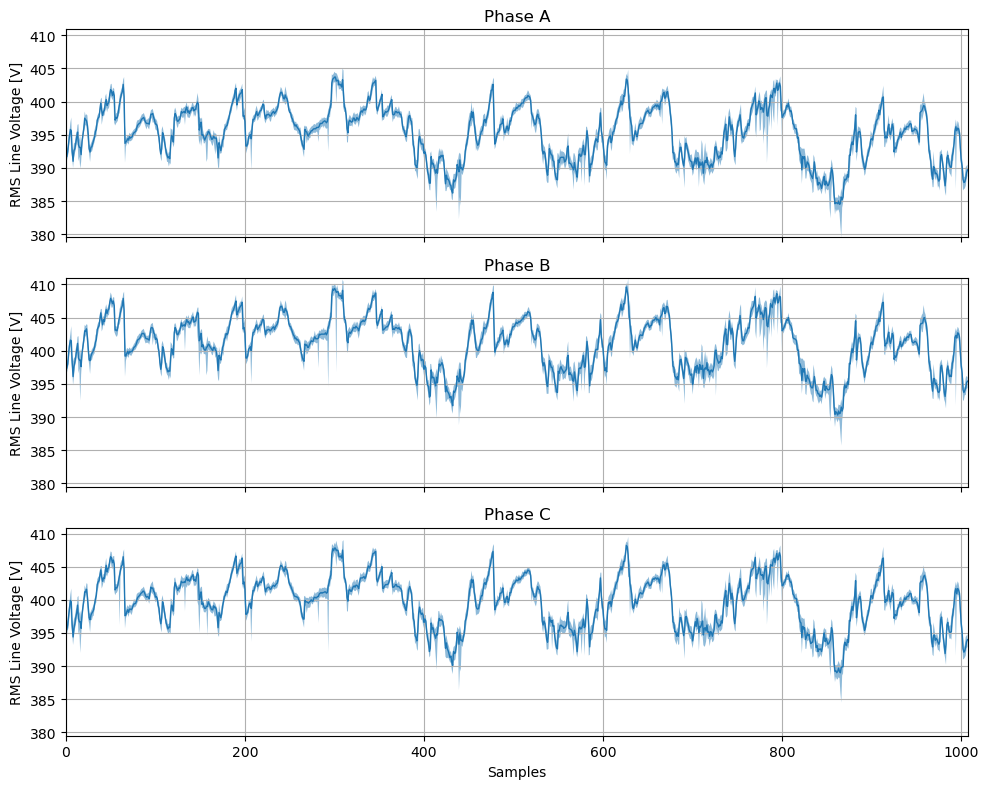

In [9]:
# --------- Generate steady-state line-to-line voltage plots (envelope + average)
N_STEPS = 1008
t = np.arange(N_STEPS)

# Y-axis bounds based on measured min/max across phases (line-to-line)
y_plot_max = max(data_VU["Vab_max"].max(), data_VU["Vbc_max"].max(), data_VU["Vca_max"].max())
y_plot_min = min(data_VU["Vab_min"].min(), data_VU["Vbc_min"].min(), data_VU["Vca_min"].min())

def edit_line_voltage_plot(ax, v_max, v_min, v_avg, phase):
    ax.grid(True)

    # Measured envelope + average
    ax.fill_between(t, v_max, v_min, alpha=0.5, linewidth=0)
    ax.plot(t, v_avg, linewidth=1)

    ax.set_ylim([y_plot_min, y_plot_max])
    ax.set_xlim([0, N_STEPS])
    ax.set_ylabel("RMS Line Voltage [V]")
    ax.set_title(f"Phase {phase}")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))

edit_line_voltage_plot(ax1, data_VU["Vab_max"], data_VU["Vab_min"], data_VU["Vab_avg"], "A")
edit_line_voltage_plot(ax2, data_VU["Vbc_max"], data_VU["Vbc_min"], data_VU["Vbc_avg"], "B")
edit_line_voltage_plot(ax3, data_VU["Vca_max"], data_VU["Vca_min"], data_VU["Vca_avg"], "C")

ax3.set_xlabel("Samples")
plt.tight_layout()
plt.show()

# Calculate Beta

<div style="font-size: 150%;">
$$
\beta=\frac{V_{ab}^{4}+V_{bc}^{4}+V_{ca}^{4}}
{\left(V_{ab}^{2}+V_{bc}^{2}+V_{ca}^{2}\right)^{2}}
$$
</div>

In [10]:
def add_beta_np(df, vab, vbc, vca, out):
    V = df[[vab, vbc, vca]].to_numpy(dtype=float)
    s2  = (V**2).sum(axis=1)
    num = (V**4).sum(axis=1)
    den = s2**2
    df[out] = np.divide(num, den, out=np.full_like(den, np.nan, dtype=float), where=den!=0)
    return df
    
data_VU = add_beta_np(data_VU, 'Vab_min', 'Vbc_min', 'Vca_min', 'beta_min')
data_VU = add_beta_np(data_VU, 'Vab_avg', 'Vbc_avg', 'Vca_avg', 'beta_avg')
data_VU = add_beta_np(data_VU, 'Vab_max', 'Vbc_max', 'Vca_max', 'beta_max')
data_VU.head(2)

,DateTime,Vab_min,Vbc_min,Vca_min,Vab_avg,Vbc_avg,Vca_avg,Vab_max,Vbc_max,Vca_max,Weekday,Weekday_EN,Time_Type,beta_min,beta_avg,beta_max
0,2023-03-03 14:38:43,391.0,396.4,394.8,391.7,397.1,395.5,392.5,398.4,396.4,4,Friday,Day: 07h-18h,0.333377,0.333377,0.333384
1,2023-03-03 14:48:43,391.0,396.6,394.7,391.7,397.4,395.5,392.8,398.5,396.5,4,Friday,Day: 07h-18h,0.333380,0.333381,0.333381


In [11]:
# Check for NaN values in any beta
cols = ['beta_min', 'beta_avg', 'beta_max']
_nan = data_VU[cols].isna().any().any()   # bool
_nan

np.False_

# Voltage Unbalance Factor (FD/VUF)

$$
{\Large
\mathrm{FD}\% = 100 \sqrt{\frac{1-\sqrt{3-6\beta}}{1+\sqrt{3-6\beta}}}
}
$$


In [12]:
def add_fd(df, beta_col, out_col):
    b = df[beta_col].to_numpy(float)
    s = np.sqrt(3.0 - 6.0 * b)
    r = (1.0 - s) / (1.0 + s)
    df[out_col] = 100.0 * np.sqrt(r)
    return df

data_VU = add_fd(data_VU, 'beta_min', 'FD_min')
data_VU = add_fd(data_VU, 'beta_avg', 'FD_avg')
data_VU = add_fd(data_VU, 'beta_max', 'FD_max')
data_VU.head(2)

,DateTime,Vab_min,Vbc_min,Vca_min,Vab_avg,Vbc_avg,Vca_avg,Vab_max,Vbc_max,Vca_max,Weekday,Weekday_EN,Time_Type,beta_min,beta_avg,beta_max,FD_min,FD_avg,FD_max
0,2023-03-03 14:38:43,391.0,396.4,394.8,391.7,397.1,395.5,392.5,398.4,396.4,4,Friday,Day: 07h-18h,0.333377,0.333377,0.333384,0.811723,0.810285,0.874482
1,2023-03-03 14:48:43,391.0,396.6,394.7,391.7,397.4,395.5,392.8,398.5,396.5,4,Friday,Day: 07h-18h,0.333380,0.333381,0.333381,0.833518,0.847772,0.842567


In [13]:
# Check for NaN values in any FD
cols = ['FD_min', 'FD_avg', 'FD_max']
_nan = data_VU[cols].isna().any().any()   # bool
_nan

np.False_

# Calculate percentiles


$$
{\Large
L_k=\left[\,(n-1)\cdot\frac{k}{100}\,\right]+1
}
$$


In [14]:
p95_fd_min = np.percentile(data_VU['FD_min'], 95)
p95_fd_avg = np.percentile(data_VU['FD_avg'], 95)
p95_fd_max = np.percentile(data_VU['FD_max'], 95)

[p95_fd_min, p95_fd_avg, p95_fd_max]

[np.float64(1.0468441578225538),
 np.float64(1.031555580690514),
 np.float64(1.036696901306777)]

# Charts

In [15]:
def plot_lollipop(
    df: pd.DataFrame,
    y_col: str,
    weekday_col: str,
    figsize=(16, 4),
    dpi: int = 300,
    y_lim=(0, 1.6),
    draw_boundaries: bool = True,
    shade_alternating: bool = True,
    constant_line_value: float = None,
    constant_line_label: str = "p95_fd_min",
):
    """
    Plots a lollipop chart and adds a secondary top X-axis
    with weekday intervals defined by another DataFrame column.

    Parameters
    ----------
    constant_line_value : float or None
        If provided, draws a horizontal red line at this value.
    constant_line_label : str or None
        Label shown in the legend for the horizontal line.
    """

    n = len(df)
    if n == 0:
        raise ValueError("Empty DataFrame.")

    # X-axis = sequential sample index
    x = np.arange(n)

    # Y series
    y = pd.to_numeric(df[y_col], errors="coerce").to_numpy()

    # Weekday column (as string)
    wd = df[weekday_col].astype(str).to_numpy()

    # --- Base plot (lollipop) ---
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.vlines(x, 0, y, linewidth=0.3)  # thin stems
    ax.scatter(x, y, s=5)              # top points

    ax.set_xlabel("Sample Number", fontsize=16)
    ax.set_ylabel(str(y_col), fontsize=16)

    if y_lim is not None:
        ax.set_ylim(*y_lim)

    ax.grid(True, axis="y", linewidth=0.3, alpha=0.5)

    # --- Constant horizontal line (optional) ---
    if constant_line_value is not None:
        ax.axhline(
            y=constant_line_value,
            color="red",
            linewidth=1,
            label=str(constant_line_label) if constant_line_label else None,
        )
        if constant_line_label:
            ax.legend(loc="upper right", fontsize=9, frameon=False)

    # --- Interval calculation (when weekday changes) ---
    if n > 1:
        change_idx = np.where(wd[1:] != wd[:-1])[0] + 1
    else:
        change_idx = np.array([], dtype=int)

    starts = np.r_[0, change_idx]
    ends = np.r_[change_idx, n]
    mids = (starts + ends - 1) / 2.0
    labels = [wd[s] for s in starts]

    # --- Top axis with weekday labels ---
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(mids)
    ax_top.set_xticklabels(labels, fontsize=12)
    ax_top.xaxis.set_ticks_position("top")
    ax_top.tick_params(axis="x", which="both", length=0, pad=6)
    ax_top.set_xlabel("Weekdays", fontsize=16, labelpad=8)

    # Boundary lines between weekdays (optional)
    if draw_boundaries and len(change_idx) > 0:
        for idx in change_idx:
            ax.axvline(idx, linestyle="--", linewidth=0.5, alpha=0.5)

    # Alternating block shading (optional)
    if shade_alternating:
        for i, (s, e) in enumerate(zip(starts, ends)):
            if i % 2 == 0:
                ax.axvspan(s - 0.5, e - 0.5, alpha=0.06)

    plt.tight_layout()
    return fig, ax, ax_top


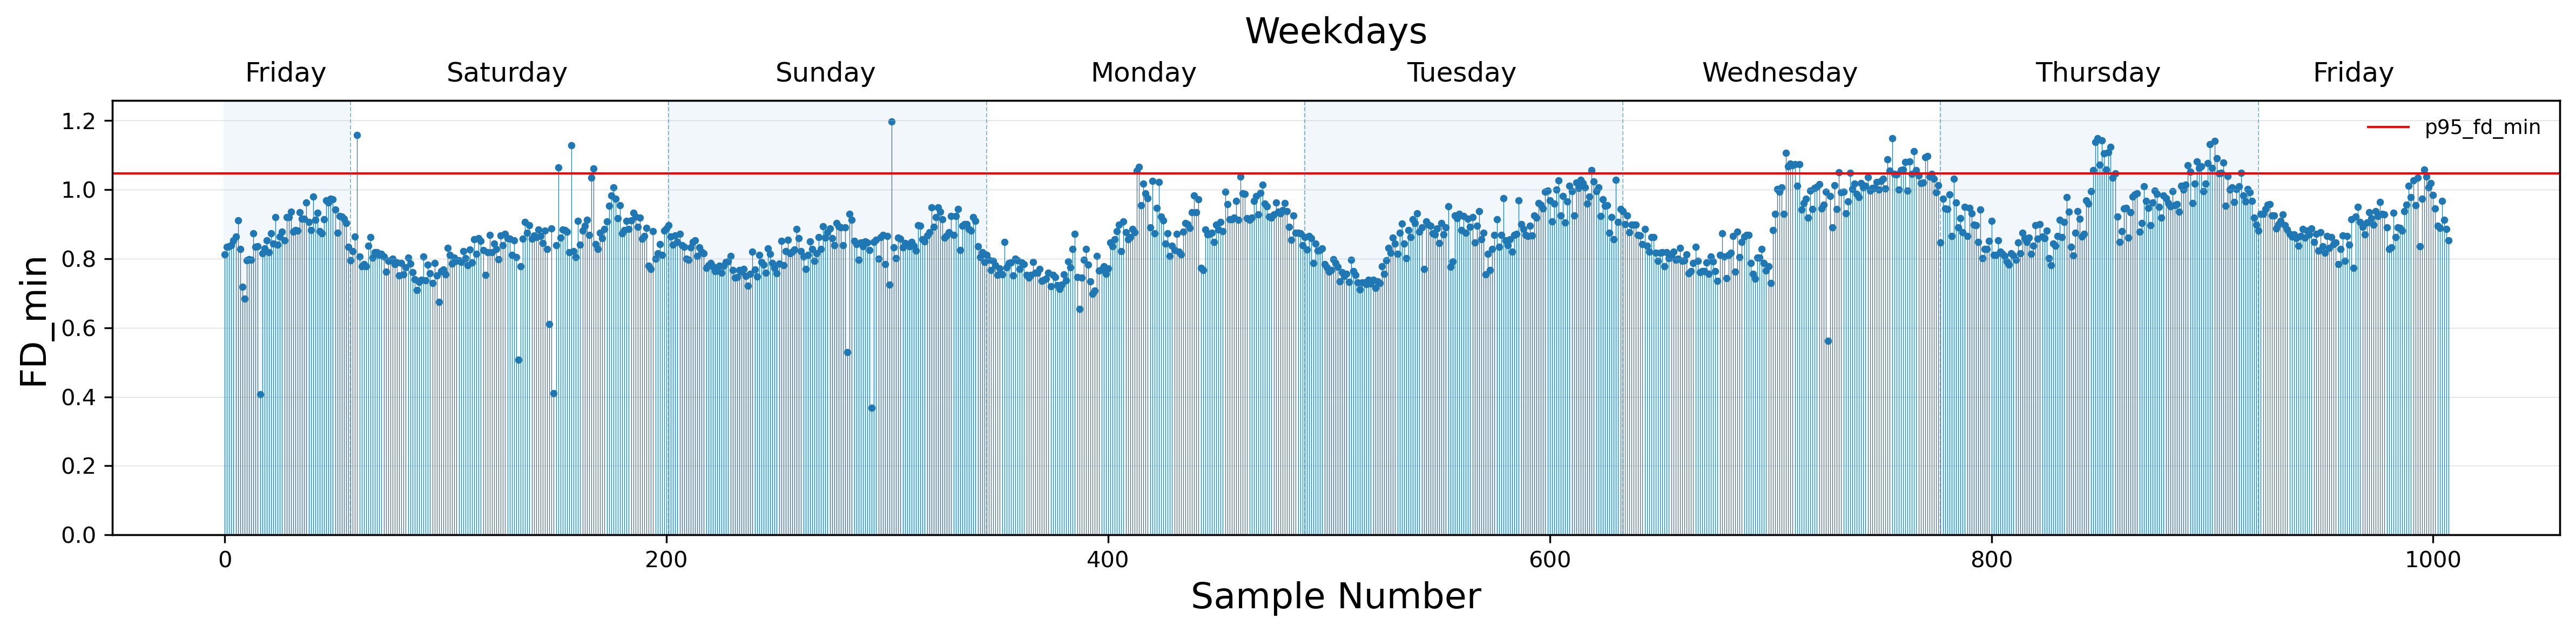

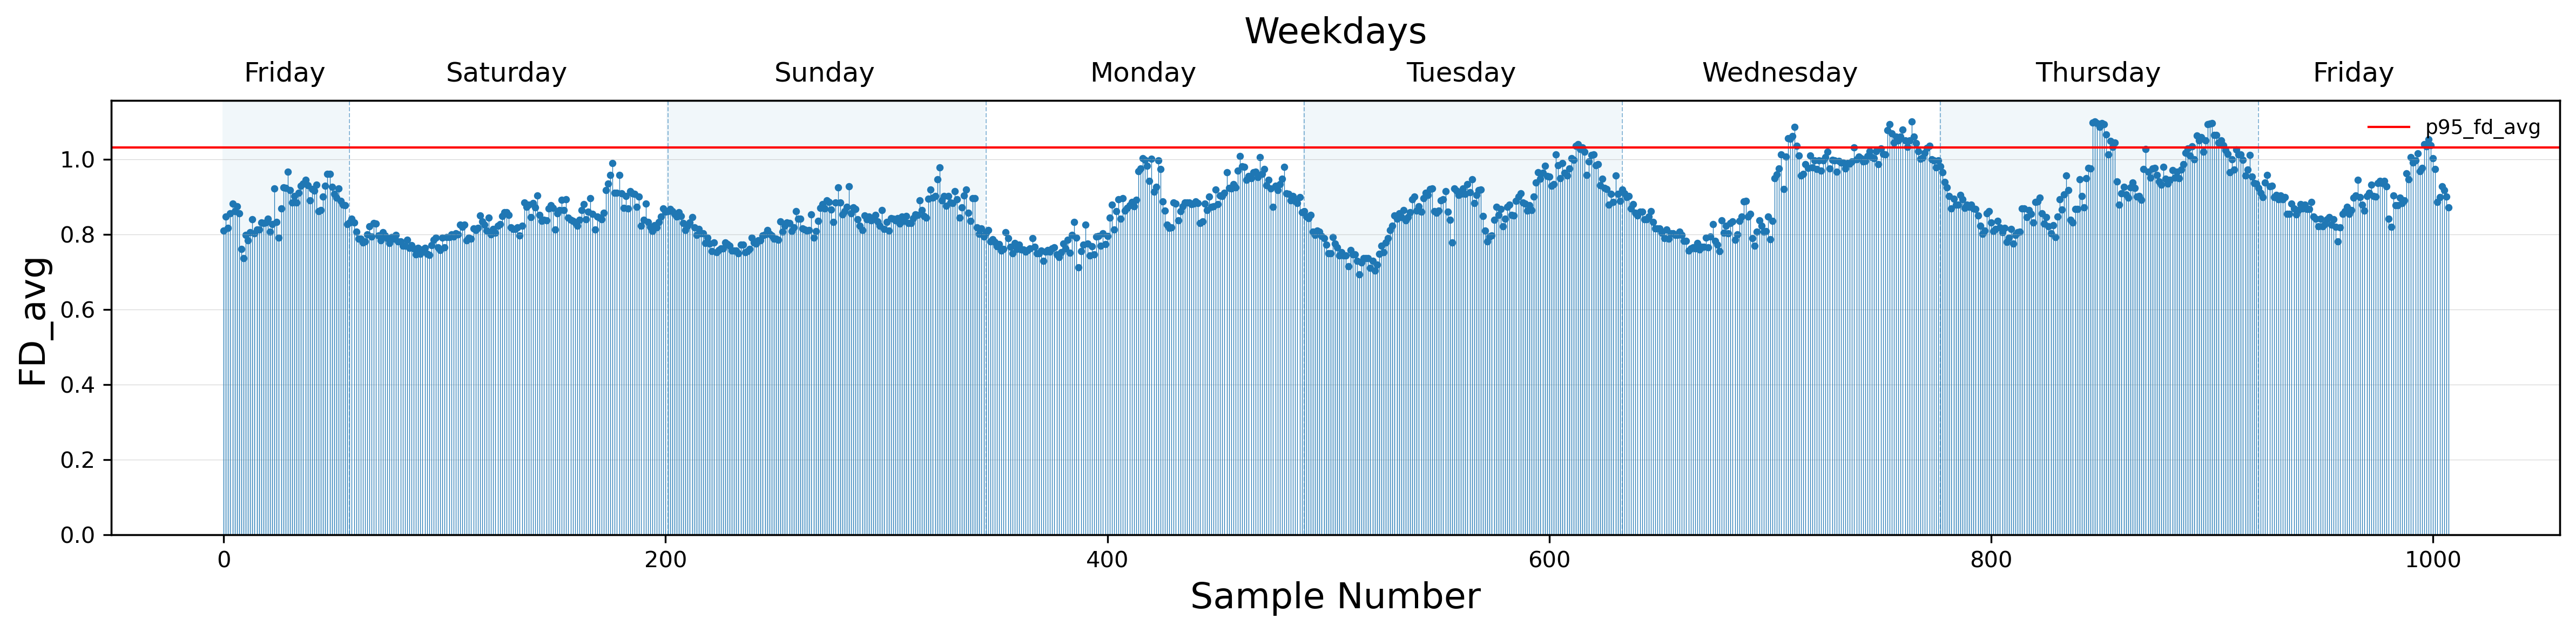

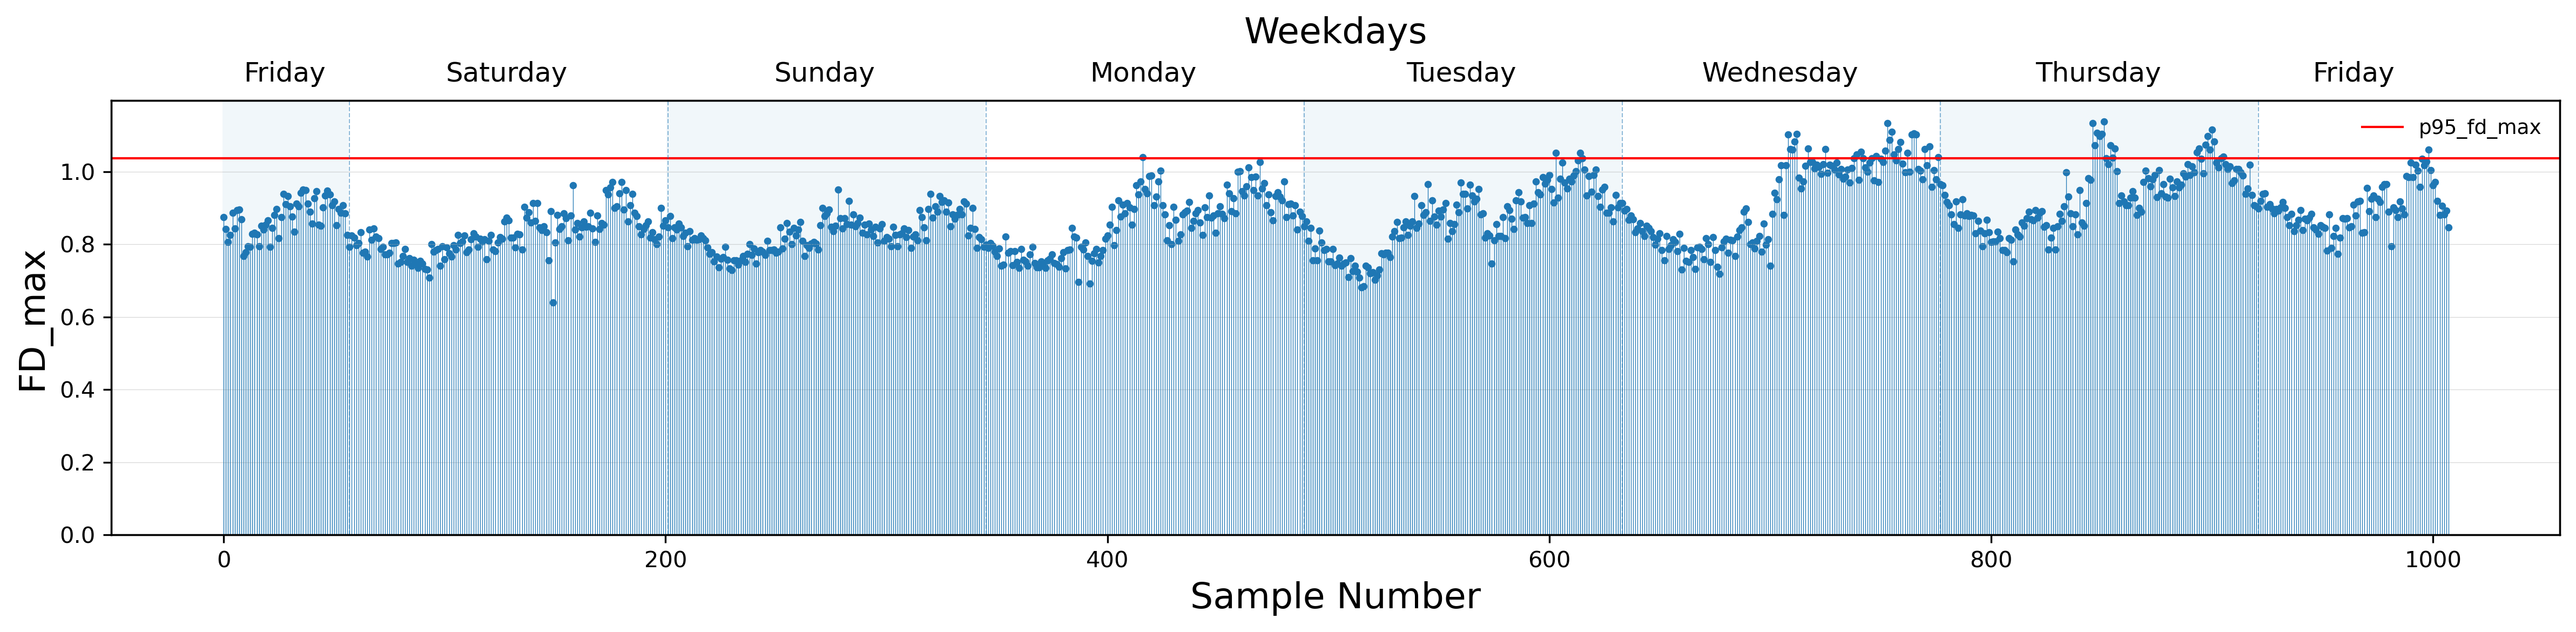

In [16]:
fig = plot_lollipop(data_VU, 'FD_min', 'Weekday_EN', constant_line_value=p95_fd_min, constant_line_label="p95_fd_min", y_lim = (0, data_VU['FD_min'].max()+ data_VU['FD_min'].max()*0.05))
fig = plot_lollipop(data_VU, 'FD_avg', 'Weekday_EN', constant_line_value=p95_fd_avg, constant_line_label="p95_fd_avg", y_lim = (0, data_VU['FD_avg'].max()+ data_VU['FD_avg'].max()*0.05))
fig = plot_lollipop(data_VU, 'FD_max', 'Weekday_EN', constant_line_value=p95_fd_max, constant_line_label="p95_fd_max", y_lim = (0, data_VU['FD_max'].max()+ data_VU['FD_max'].max()*0.05))
plt.show()

# Pie charts

In [17]:
def create_pie_chart_by_time_type_sns(
    df,
    column,
    flag_column,
    threshold_value,
    phase="",
    ax=None,
    startangle=90,
    figsize=(5, 5),
    legend_title="Category",
    title_fontsize=16,
    title_pad=10
):
    sns.set_theme(style="white")

    df = df.copy()
    df[flag_column] = np.where(df[column] > threshold_value, 1, 0)
    mask = df[flag_column] == 1

    counts = df.loc[mask, "Time_Type"].value_counts(dropna=False)
    counts = counts[counts > 0]

    if counts.sum() == 0:
        if ax is None:
            _, ax = plt.subplots(figsize=figsize)
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(f"{phase} | {column} > {threshold_value}", fontsize=title_fontsize, pad=title_pad)
        ax.axis("off")
        return ax

    # Ordenar em ordem decrescente
    counts = counts.sort_values(ascending=False)
    values = counts.values
    labels = counts.index.tolist()
    total = values.sum()
    percentages = values / total * 100

    legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(labels, percentages)]

    if ax is None:
        _, ax = plt.subplots(figsize=figsize)

    colors = sns.color_palette("tab10", len(values))

    wedges = ax.pie(
        values,
        labels=None,  # nada dentro da pizza
        startangle=startangle,
        counterclock=False,
        colors=colors,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
    )[0]

    ax.axis("equal")
    ax.set_title(f"{phase} | {column} > {threshold_value:.4f} by time of day",
                 fontsize=title_fontsize,
                 pad=title_pad)

    ax.legend(
        wedges,
        legend_labels,
        title=legend_title,
        loc="center left",
        bbox_to_anchor=(1.05, 0.5),
        frameon=False,
    )

    plt.tight_layout()
    return ax


<Axes: title={'center': ' | FD_max > 1.0367 by time of day'}>

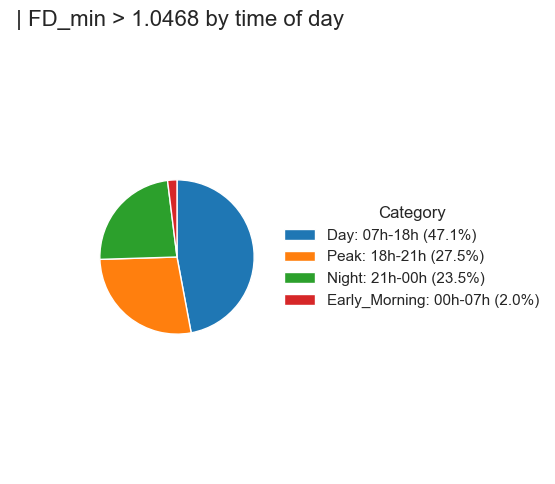

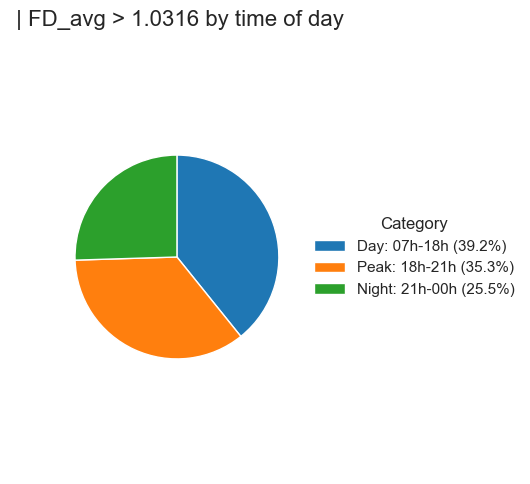

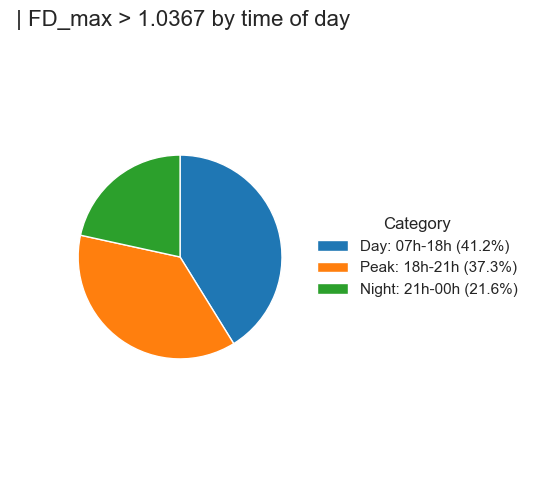

In [18]:
create_pie_chart_by_time_type_sns(data_VU, 'FD_min', 'flag_FD_min', p95_fd_min)
create_pie_chart_by_time_type_sns(data_VU, 'FD_avg', 'flag_FD_avg', p95_fd_avg)
create_pie_chart_by_time_type_sns(data_VU, 'FD_max', 'flag_FD_max', p95_fd_max)

In [19]:
def create_pie_chart_by_weekday_sns(
    df,
    column,
    flag_column,
    threshold_value,
    phase="",
    ax=None,
    startangle=90,
    figsize=(5, 5),
    legend_title="Weekday",
    title_fontsize=16,
    title_pad=10
):

    sns.set_theme(style="white")

    order = [
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ]

    df = df.copy()
    df[flag_column] = np.where(df[column] > threshold_value, 1, 0)
    mask = df[flag_column] == 1

    s = df.loc[mask, "Weekday_EN"].astype(
        pd.CategoricalDtype(categories=order, ordered=True)
    )
    counts = s.value_counts(sort=False)
    counts = counts[counts > 0]

    if counts.sum() == 0:
        if ax is None:
            _, ax = plt.subplots(figsize=figsize)
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(f"{phase} | {column} > {threshold_value}", fontsize=title_fontsize, pad=title_pad)
        ax.axis("off")
        return ax

    # Ordenar em ordem decrescente
    counts = counts.sort_values(ascending=False)
    values = counts.values
    labels = counts.index.tolist()
    total = values.sum()
    percentages = values / total * 100

    legend_labels = [
        f"{label} ({pct:.1f}%)"
        for label, pct in zip(labels, percentages)
    ]

    if ax is None:
        _, ax = plt.subplots(figsize=figsize)

    colors = sns.color_palette("tab10", len(values))

    wedges = ax.pie(
        values,
        labels=None,
        startangle=startangle,
        counterclock=False,
        colors=colors,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
    )[0]

    ax.axis("equal")
    ax.set_title(f"{phase} | {column} > {threshold_value:.4f} by weekday",
                 fontsize=title_fontsize,
                 pad=title_pad)

    ax.legend(
        wedges,
        legend_labels,
        title=legend_title,
        loc="center left",
        bbox_to_anchor=(1.05, 0.5),
        frameon=False,
    )

    plt.tight_layout()
    return ax


<Axes: title={'center': ' | FD_max > 1.0367 by weekday'}>

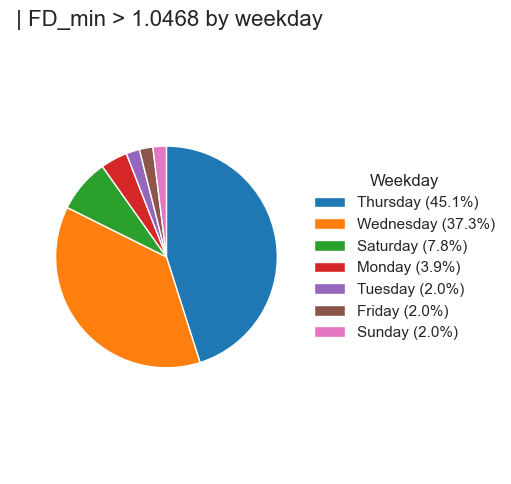

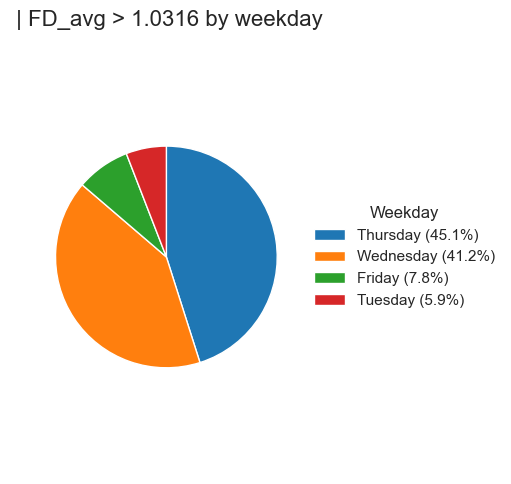

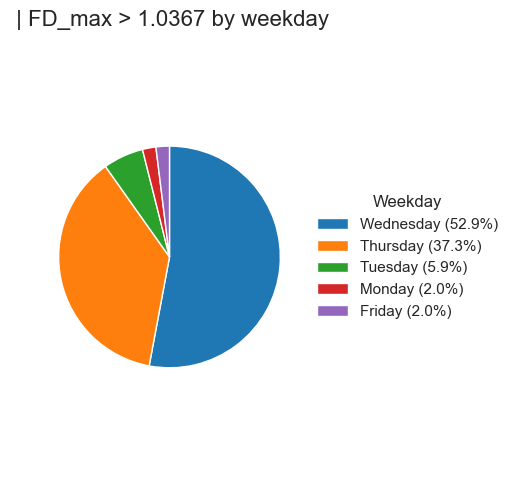

In [20]:
create_pie_chart_by_weekday_sns(data_VU, 'FD_min', 'flag_FD_min', p95_fd_min)
create_pie_chart_by_weekday_sns(data_VU, 'FD_avg', 'flag_FD_avg', p95_fd_avg)
create_pie_chart_by_weekday_sns(data_VU, 'FD_max', 'flag_FD_max', p95_fd_max)